# Breast cancer prediction

In [838]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [839]:
# Reading breast cancer data.csv file
df = pd.read_csv("data.csv")

In [840]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [841]:
# Checking column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [842]:
# confirming null values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [843]:
# check number of rows
df.shape

(569, 33)

This means 'unnamed: 32' column has all null values. Hence, this column can be dropped.

In [845]:
# Dropping unnamed: 32 column
df = df.dropna(axis=1)

# Dropping ID column since it will not be useful for prediction
df.drop('id',axis=1,inplace=True)

In [846]:
# Viewing summary statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Since 'mean' and 'std' values for different columns are quite different w.r.t each other, scaling would be required

In [848]:
# Checking count of malignant(M) and benign(B) cells
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

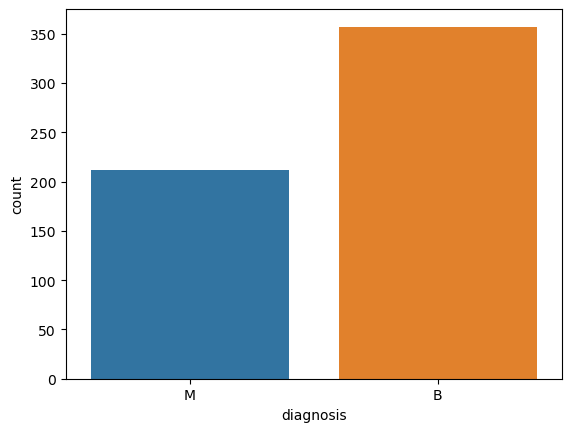

In [849]:
sns.countplot(x=df['diagnosis'],hue=df['diagnosis'])

In [850]:
# Transforming 'M' and 'B' values to '1' and '0'
df['diagnosis']=df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [851]:
# Understanding the correlation matrix w.r.t target variable
df.iloc[:,0:].corr()['diagnosis']

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

There are some features like 'fractal_dimension_mean', 'symmetry_se', 'smoothness_se' etc. that have very less correlation with the target variable that is diagnois. Hence, feature reduction will be useful in such scenarios.

<Axes: >

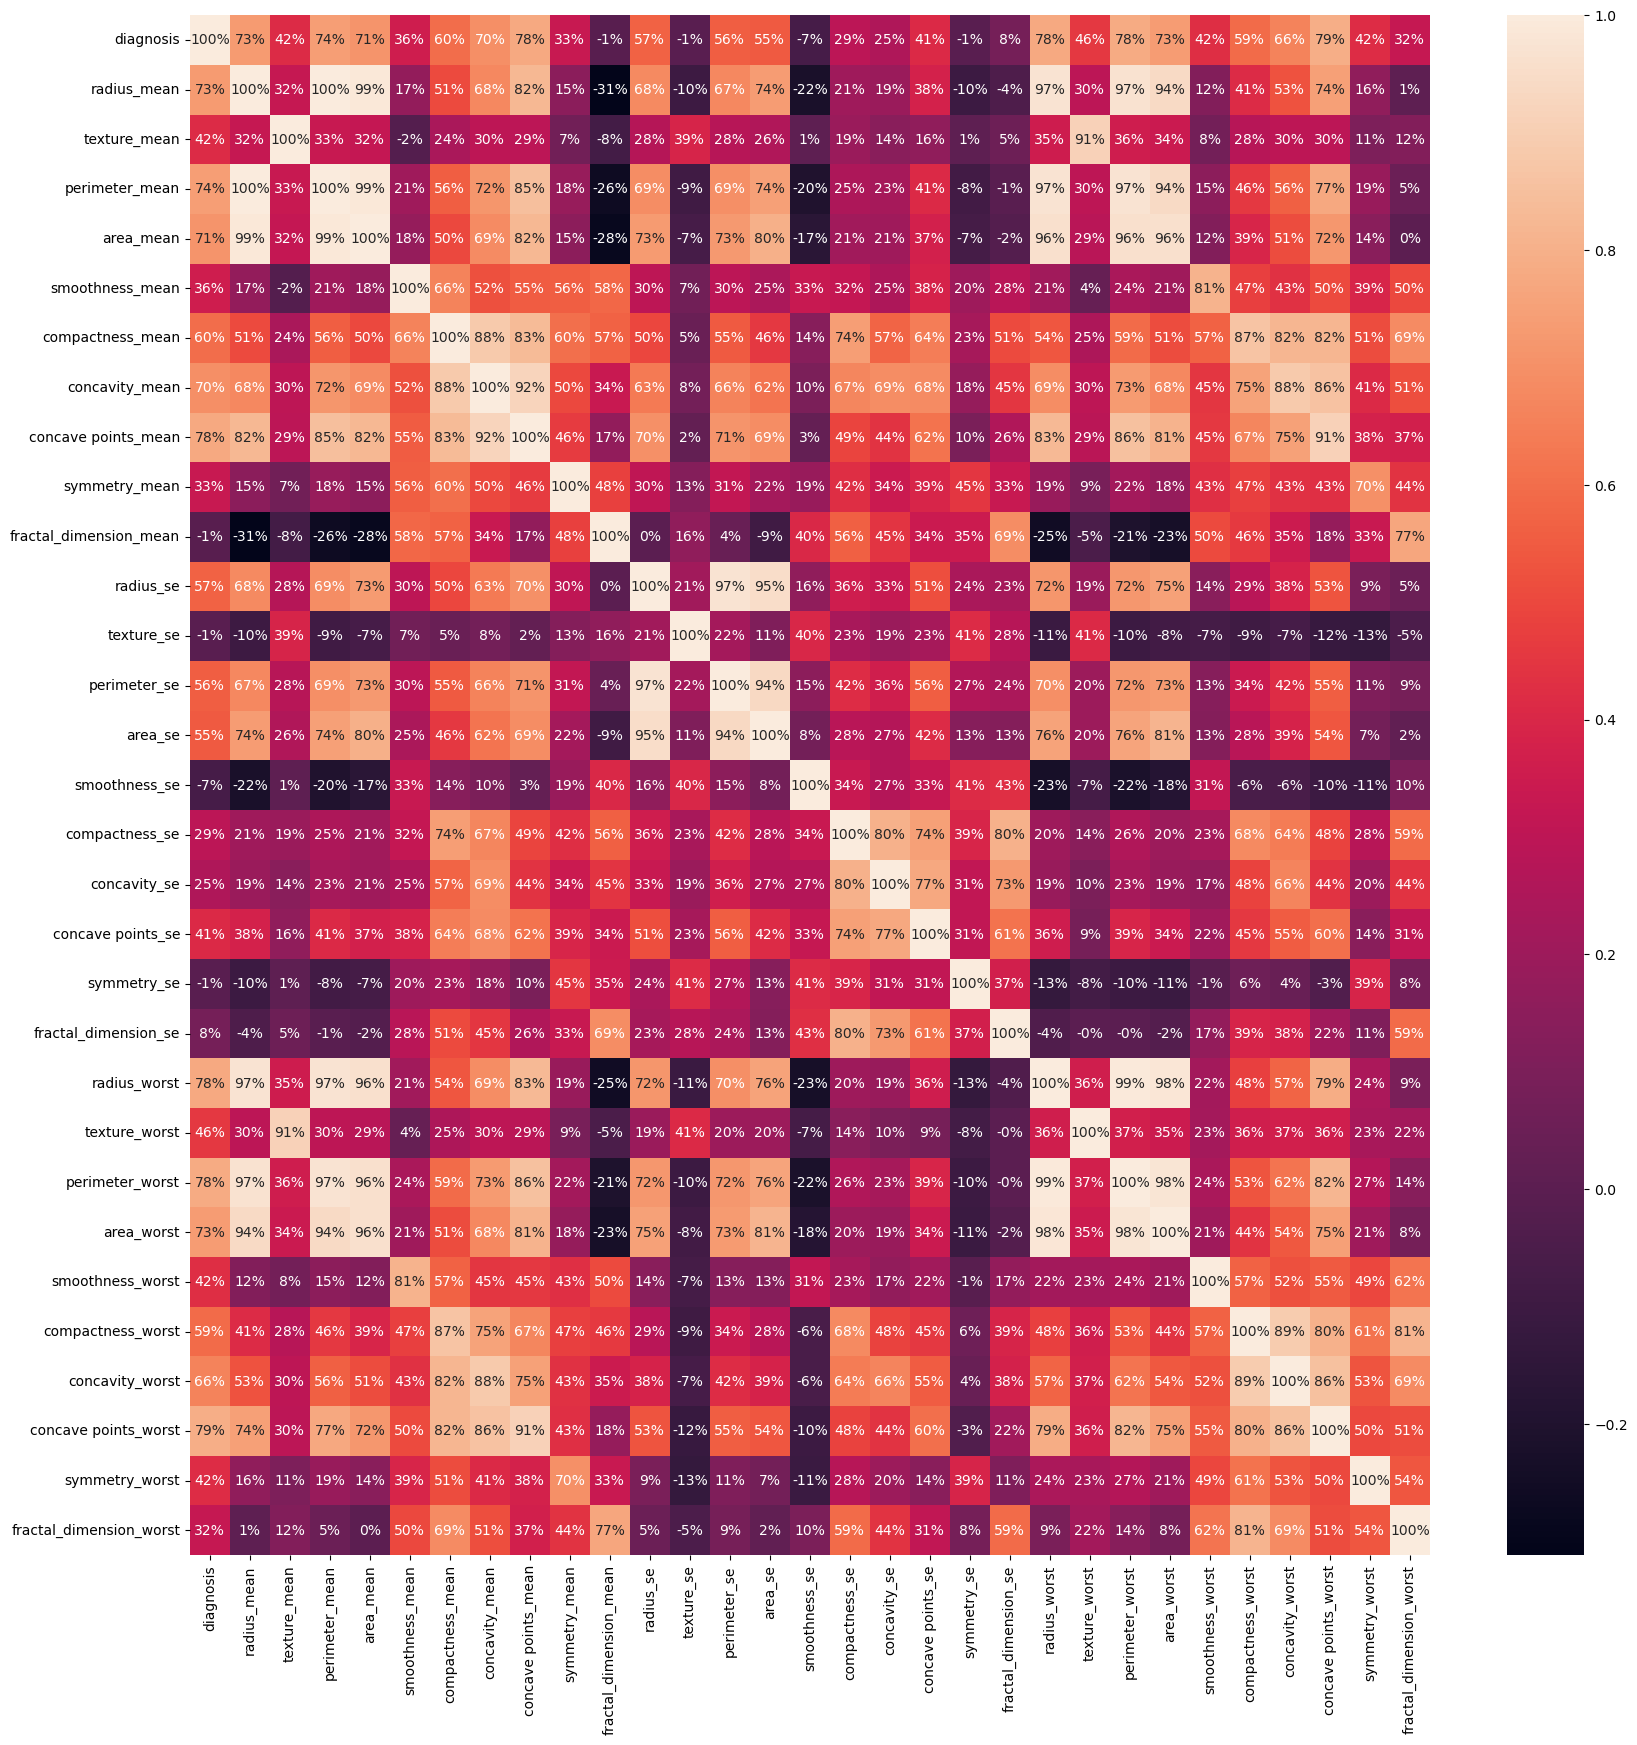

In [853]:
# Visualizing the correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[0:,0:].corr(),annot=True,fmt='.0%')

In [854]:
df.shape

(569, 31)

### Outlier Detection

In [856]:
# Defining the kernel density plot function
def plot_kde_plots(df, figsize, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Loop over each feature and create histplot
    for indx, feature in enumerate(df.columns):
        sns.histplot(df[feature].dropna(), kde=True, ax=axes[indx])
        axes[indx].set_title(f'{feature} Distribution', fontsize=10)
        
    plt.tight_layout()

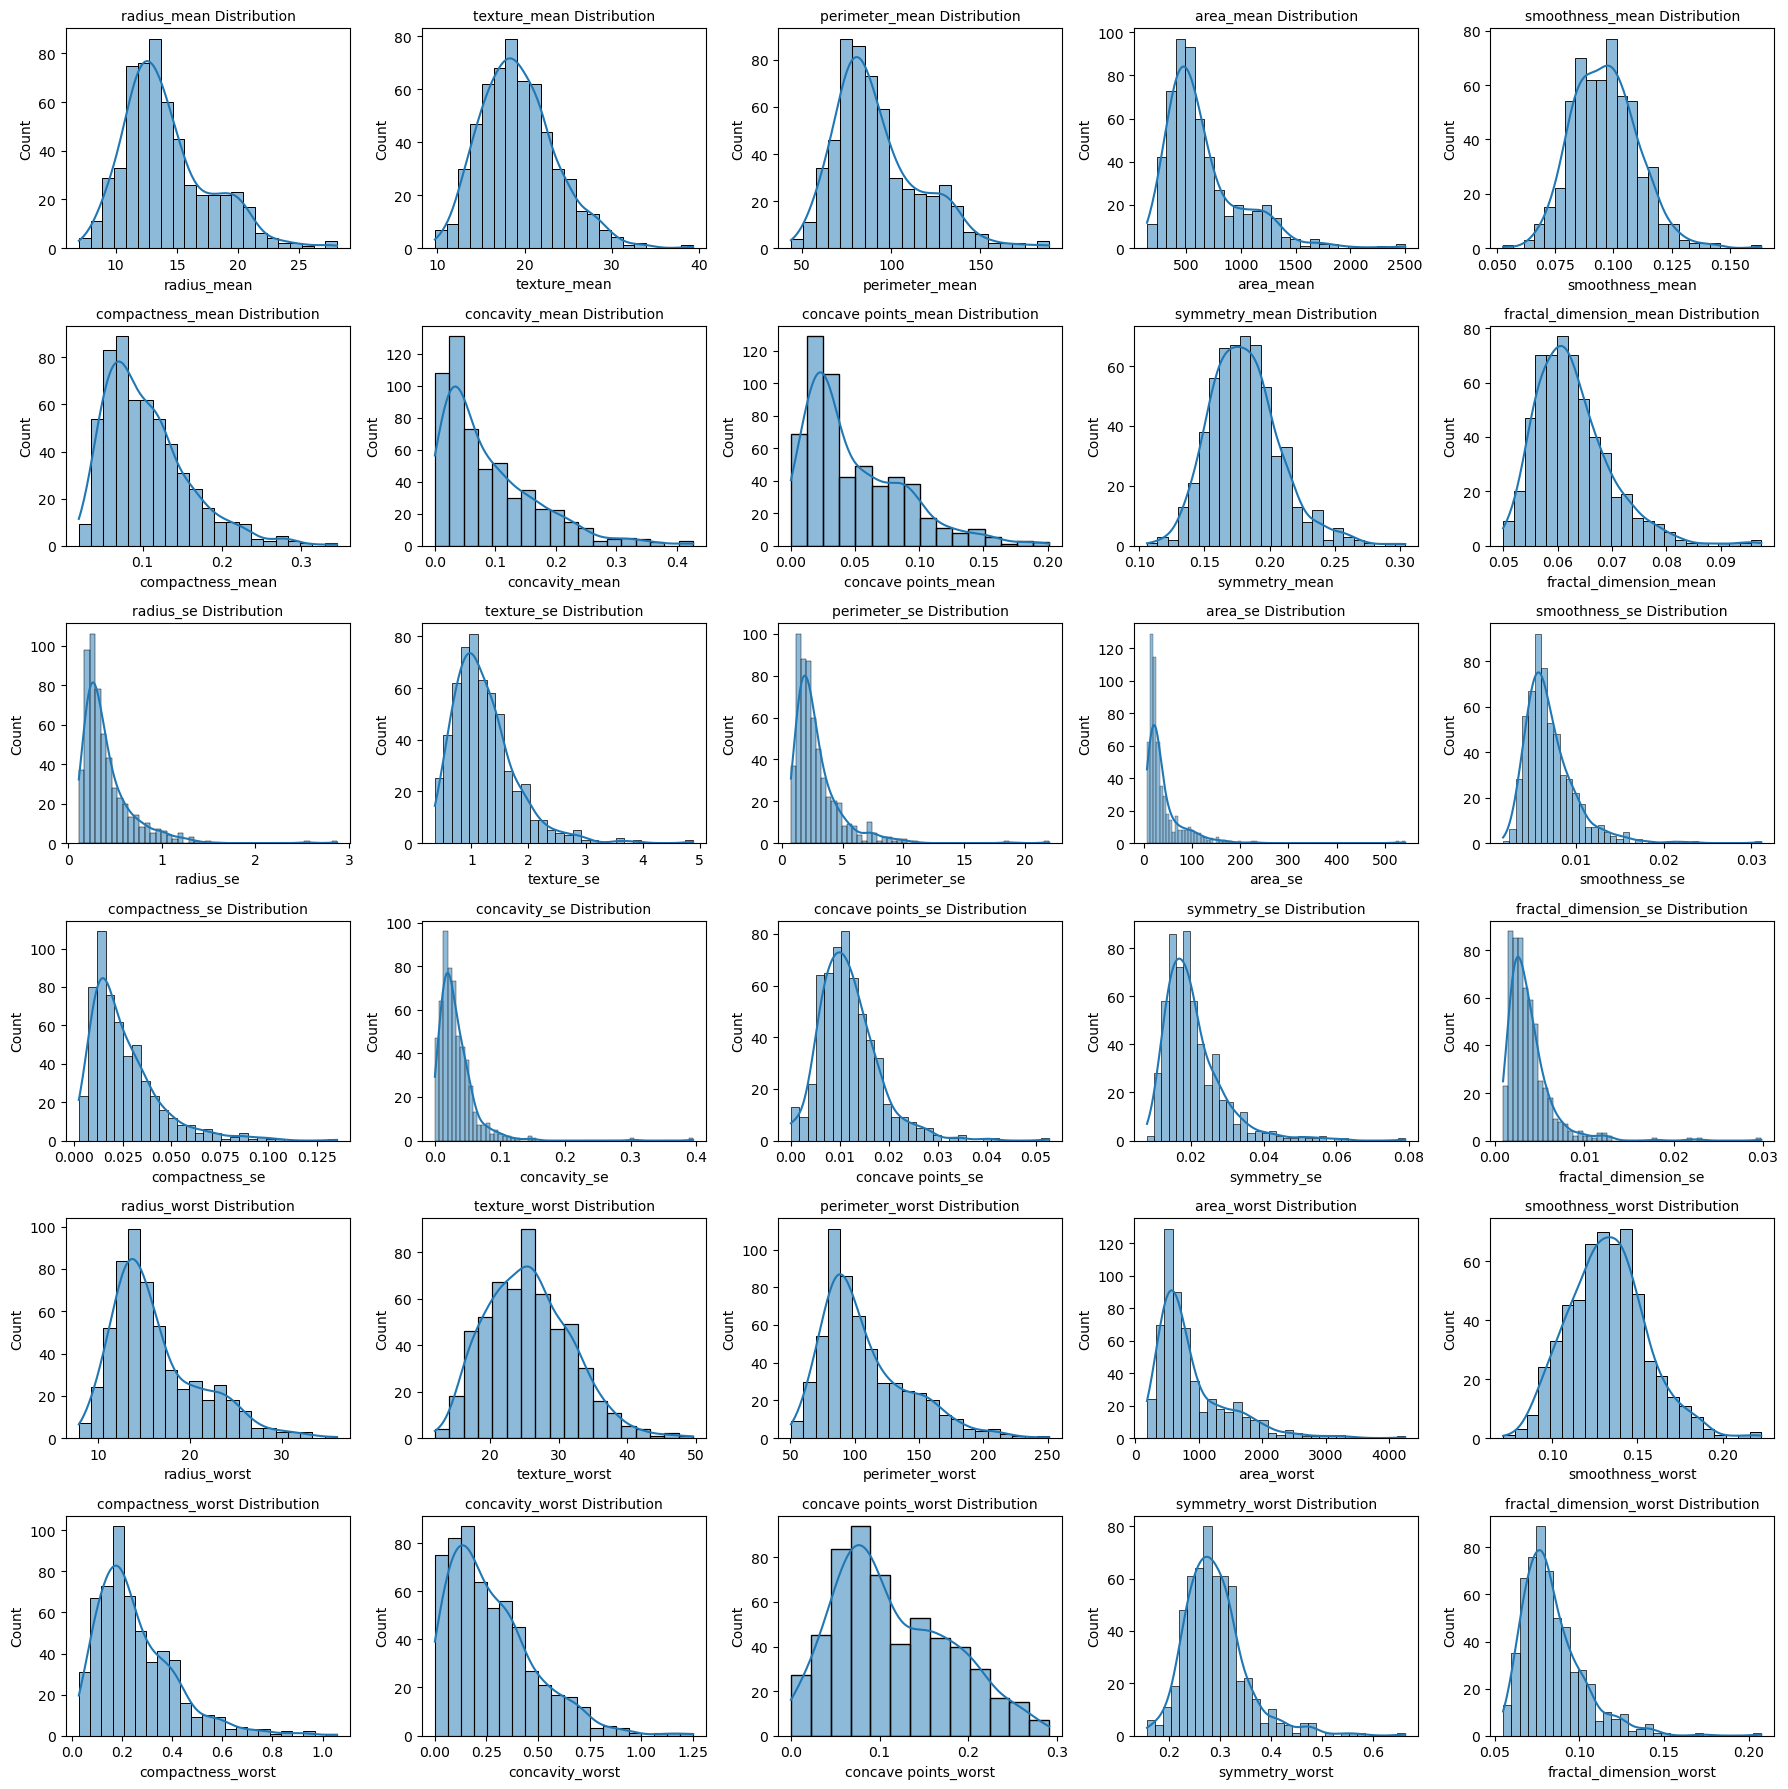

In [857]:
# Plotting the kde plots
plot_kde_plots(df.iloc[:,1:], figsize=(18, 18), n_rows=6, n_cols=5)

These plots with KDE help us visualize that some features do contain outliers, so we need to remove them

In [859]:
# Split the dataset into dependent(X) and Independent(Y) datasets
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values

In [860]:
# Performing train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [861]:
# Using isolation forest to remove outliers
outlier = IsolationForest(n_estimators=300, contamination = 0.02, max_samples = 0.8, max_features=0.9)
outlier.fit(X_train)
in_out_train=outlier.predict(X_train)
in_out_test=outlier.predict(X_test)

In [862]:
X_train_i = X_train[in_out_train==1] ## inlier training feature set
Y_train_i = Y_train[in_out_train==1] ## inlier training target set

X_test_i =X_test[in_out_test==1] ## inlier testing feature set
Y_test_i =Y_test[in_out_test==1] ## inlier testing target set

print("Before Outlier removal:",X_train.shape)
print("After Outlier removal:",X_train_i.shape)

Before Outlier removal: (455, 30)
After Outlier removal: (445, 30)


### Scaling

In [864]:
# Feature scaling to normalize the data

# Instantiate scaler
scaler = StandardScaler()

# Fitting the scaler on training data and transforming both training and test data (without outliers)
X_train_s_i = scaler.fit_transform(X_train_i)
X_test_s_i = scaler.transform(X_test_i)

print("mean test data: %s" % X_test_s_i.mean(axis=0))
print("\nstandard deviation : %s " % X_test_s_i.std(axis=0))

mean test data: [-0.01393495  0.13191229 -0.00944324 -0.00924119 -0.04849672  0.03077027
  0.04323009 -0.01804941 -0.02457479  0.07381742  0.05079792  0.02787902
  0.07710225  0.01573349  0.10833162  0.09128568  0.10251529  0.09374596
 -0.05865948  0.19169818 -0.0205325   0.0822009  -0.01039755 -0.02868101
 -0.03087707  0.02953115  0.0877509  -0.0242034  -0.08227933  0.12122835]

standard deviation : [0.999792   1.13986323 1.00000974 0.95210426 1.07454473 1.09910126
 1.05178789 0.96917115 0.89235458 1.21004398 0.99279673 1.03790065
 0.99874446 0.966677   1.31848017 1.11377619 1.10560425 1.20246976
 0.80367192 1.19339075 0.93587751 1.02492333 0.93322186 0.86059333
 1.03791625 1.07754665 1.1891038  0.99458038 0.84476944 1.10673491] 


In [865]:
# # Feature reduction using PCA

# # Instantiate PCA
# pca = PCA()

# # Explaining 90% variance
# pca = PCA(n_components=0.90)

# # Fitting PCA on the scaled training data and transforming both training and test data
# X_train_r_s_i = pca.fit_transform(X_train_s_i)
# X_test_r_s_i = pca.transform(X_test_s_i)

# # Feature reduced
# print('Features reduced from',X_train_s_i.shape[1], 'to',X_train_r_s_i.shape[1])

### Feature selection

In [867]:
# F score and p value using f_classif
f, p = f_classif(X_train_s_i, Y_train_i)

# mutual info score using mutual_info_classif
mi = mutual_info_classif(X_train_s_i, Y_train_i)

Text(0.5, 0, 'features')

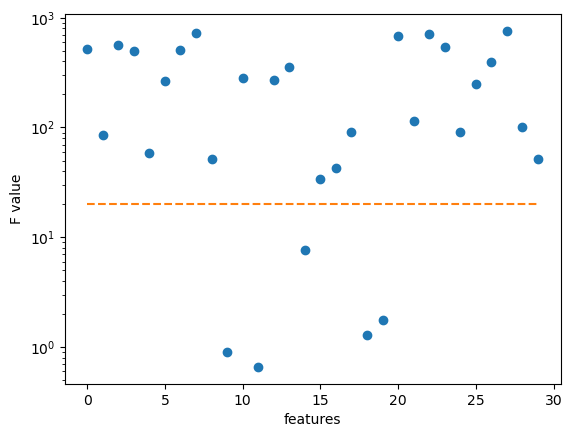

In [868]:
# Plotting f value
plt.figure()
plt.plot(f, 'o')
plt.semilogy(20*np.ones(len(f)), '--')
plt.ylabel('F value')
plt.xlabel('features')

Text(0.5, 0, 'features')

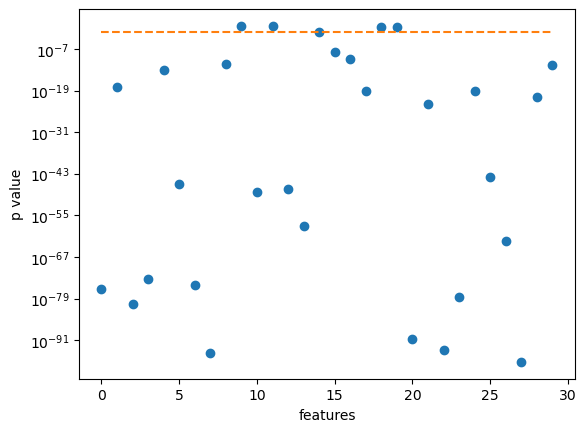

In [869]:
# Plotting p value
plt.figure()
plt.semilogy(p, 'o')
plt.semilogy((10**-2)*np.ones(len(p)), '--')
plt.ylabel('p value')
plt.xlabel('features')

Text(0.5, 0, 'features')

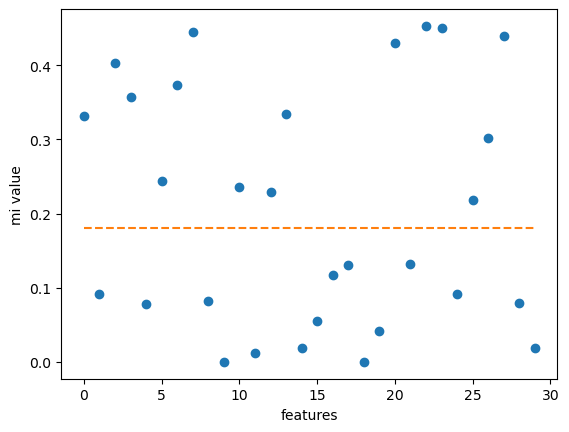

In [870]:
plt.figure()
plt.plot(mi, 'o')
plt.plot(0.18*np.ones(len(mi)), '--')
plt.ylabel('mi value')
plt.xlabel('features')

A higher f score with low p value & a high mi score represent informative features

In [872]:
# Defining the threshold
print('no. of significant features: {}'.format(len(p[((f>20)&(p<10**-2))|(mi>0.18)])))

no. of significant features: 25


In [873]:
# use SelectPercentile to select 25/30 (0.83) of features:
select = SelectPercentile(score_func=f_classif,percentile=83)
select.fit(X_train_s_i, Y_train_i)

# transform training set by reducing number of features
X_train_r_s_i = select.transform(X_train_s_i)

# transform training set by reducing number of features
X_test_r_s_i = select.transform(X_test_s_i)

print("before: {}".format(X_train_s_i.shape))
print("after: {}".format(X_train_r_s_i.shape))

before: (445, 30)
after: (445, 25)


### Model Training

In [927]:
# Defining different ML algorithms
def models(X_train, Y_train):

    # Logistic regression
    log = LogisticRegression()
    log.fit(X_train , Y_train)

    # Decision tree
    tree=DecisionTreeClassifier(criterion='entropy')
    tree.fit(X_train, Y_train)

    # Random forest
    forest=RandomForestClassifier(criterion='entropy', n_estimators=10)
    forest.fit(X_train, Y_train)

    # Displaying accuracy
    print('1. Logistic regression accuracy:',log.score(X_train,Y_train))
    print('2. Decision regression accuracy:',tree.score(X_train,Y_train))
    print('3. Random forest accuracy:',forest.score(X_train,Y_train))

    return log,tree,forest

In [929]:
model = models(X_train_r_s_i,Y_train_i)

1. Logistic regression accuracy: 0.9910112359550561
2. Decision regression accuracy: 1.0
3. Random forest accuracy: 0.9955056179775281


In [931]:
# testing the models

for i in range(len(model)):
    print('Model:',i)
    print(classification_report(Y_test_i,model[i].predict(X_test_r_s_i)))
    print('Accuracy:', accuracy_score(Y_test_i,model[i].predict(X_test_r_s_i)))

Model: 0
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.95      0.96        43

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110

Accuracy: 0.9727272727272728
Model: 1
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.89      0.95      0.92        43

    accuracy                           0.94       110
   macro avg       0.93      0.94      0.93       110
weighted avg       0.94      0.94      0.94       110

Accuracy: 0.9363636363636364
Model: 2
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.93      0.95        43

    accuracy                           0.96       110
   macro avg       0.97      0.96      0.96

In [935]:
# prediction of Logistic regression
pred = model[0].predict(X_test_r_s_i)
print('Predicted values:')
print(pred)
print('\nActual values:')
print(Y_test_i)

Predicted values:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0]

Actual values:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0]
